## Image Compression using discrete fourier transform

#### Feel free to t

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from skimage import io, color

In [3]:
robo_img = io.imread("robo.jpeg")
if robo_img.ndim == 3:
    robo_img = color.rgb2gray(robo_img)

In [4]:
robo_img.shape

(148, 148)

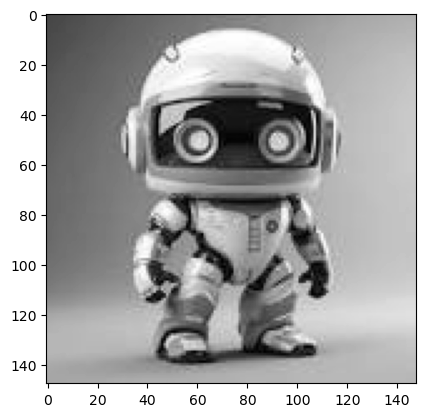

In [5]:
plt.imshow(robo_img, cmap='gray')

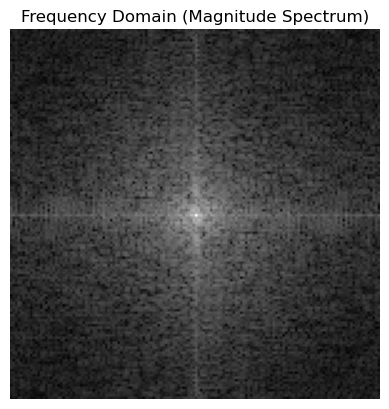

In [6]:
# Perform 2D FFT
frequency_domain = np.fft.fft2(robo_img)
frequency_domain_shifted = np.fft.fftshift(frequency_domain)

# Display the frequency domain
magnitude_spectrum = np.log(np.abs(frequency_domain_shifted) + 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Frequency Domain (Magnitude Spectrum)")
plt.axis('off')
plt.show()

(-0.5, 147.5, 147.5, -0.5)

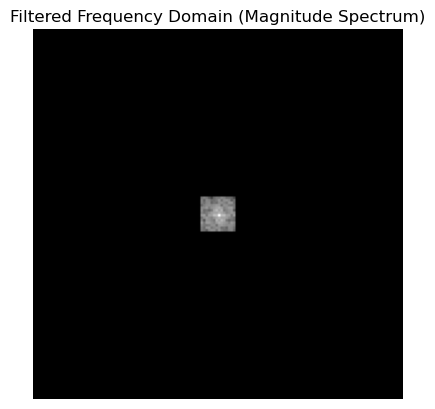

In [7]:
# Set compression level
compression_ratio = 0.1  # e.g., keep 10% of frequencies

# Create a low-pass mask
rows, cols = robo_img.shape
crow, ccol = rows // 2 , cols // 2  # Center
mask = np.zeros((rows, cols), dtype=np.uint8)
radius = int(min(crow, ccol) * compression_ratio)  # Radius based on compression ratio
mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 1

# Apply mask to frequency domain
filtered_frequency_domain = frequency_domain_shifted * mask

# Show masked frequency domain (for visualization)
filtered_magnitude_spectrum = np.log(np.abs(filtered_frequency_domain) + 1)
plt.imshow(filtered_magnitude_spectrum, cmap='gray')
plt.title("Filtered Frequency Domain (Magnitude Spectrum)")
plt.axis('off')
# plt.savefig("filtered_freq_domain.png")

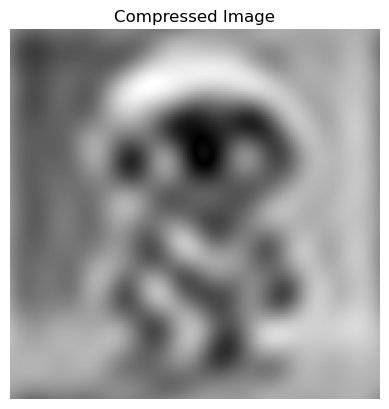

In [8]:
# Inverse shift and inverse FFT
inverse_shifted = np.fft.ifftshift(filtered_frequency_domain)
compressed_image = np.fft.ifft2(inverse_shifted)
compressed_image = np.abs(compressed_image)  # Take magnitude for real image

# Display compressed image
plt.imshow(compressed_image, cmap='gray')
plt.title("Compressed Image")
plt.axis('off')
plt.savefig("compressed_img.png")

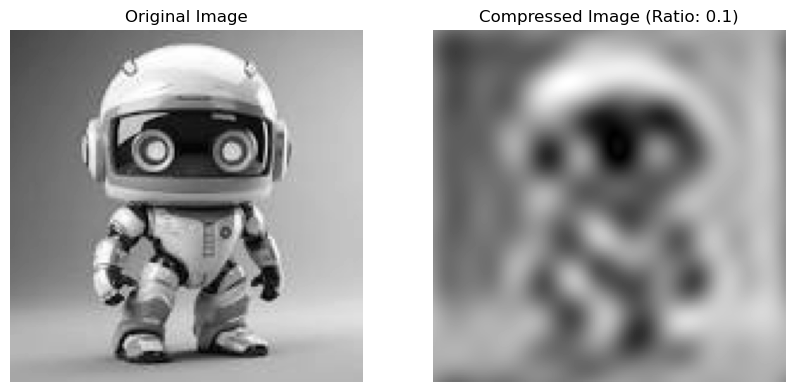

In [9]:
# Display original vs. compressed
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(robo_img, cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(compressed_image, cmap='gray')
ax2.set_title(f"Compressed Image (Ratio: {compression_ratio})")
ax2.axis('off')
plt.show()